In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Using matplotlib backend: Qt5Agg


In [2]:
data_train_path = "C:/Users/micha/Documents/AdvancedDataAnalytics/datasets/Titanic/train.csv"
data_test_path = "C:/Users/micha/Documents/AdvancedDataAnalytics/datasets/Titanic/test.csv"
data_train = pd.read_csv(data_train_path)
data_test = pd.read_csv(data_test_path)

In [3]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#plt.matshow(data_train.corr())
#plt.show()
corr = data_train.corr()
corr.style.background_gradient(cmap='Greys').set_precision(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1,-0.005,-0.035,0.037,-0.058,-0.0017,0.013
Survived,-0.005,1,-0.34,-0.077,-0.035,0.082,0.26
Pclass,-0.035,-0.34,1,-0.37,0.083,0.018,-0.55
Age,0.037,-0.077,-0.37,1,-0.31,-0.19,0.096
SibSp,-0.058,-0.035,0.083,-0.31,1,0.41,0.16
Parch,-0.0017,0.082,0.018,-0.19,0.41,1,0.22
Fare,0.013,0.26,-0.55,0.096,0.16,0.22,1


In [5]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
y_train = data_train['Survived']
X_train = data_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_test = data_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [7]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


In [8]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [9]:
X_train.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_train['Fare'] = X_train['Fare'].fillna(X_train['Fare'].median())
X_train['Embarked'] = X_train['Embarked'].fillna('S')

X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())
X_test = X_test.fillna(X_test.mean())

train_oneHot_sex = pd.get_dummies(X_train['Sex'], prefix='Sex')
train_oneHot_embarked = pd.get_dummies(X_train['Embarked'], prefix='Emb')
test_oneHot_sex = pd.get_dummies(X_test['Sex'], prefix='Sex')
test_oneHot_embarked = pd.get_dummies(X_test['Embarked'], prefix='Emb')

#Fam_train = X_train['SibSp'] + X_train['Parch']
#Fam_test = X_test['SibSp'] + X_test['Parch']

#FamSize_train = pd.DataFrame(Fam_train, columns=['FamSize'])
#FamSize_test = pd.DataFrame(Fam_test, columns=['FamSize'])

X_train = pd.concat([X_train, train_oneHot_sex, train_oneHot_embarked], axis=1).drop(['Sex', 'Embarked'], axis=1)
X_test = pd.concat([X_test, test_oneHot_sex, test_oneHot_embarked], axis=1).drop(['Sex', 'Embarked'], axis=1)

C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [11]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Emb_C,Emb_Q,Emb_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
5,3,29.699118,0,0,8.4583,0,1,0,1,0
6,1,54.000000,0,0,51.8625,0,1,0,0,1
7,3,2.000000,3,1,21.0750,0,1,0,0,1
8,3,27.000000,0,2,11.1333,1,0,0,0,1
9,2,14.000000,1,0,30.0708,1,0,1,0,0


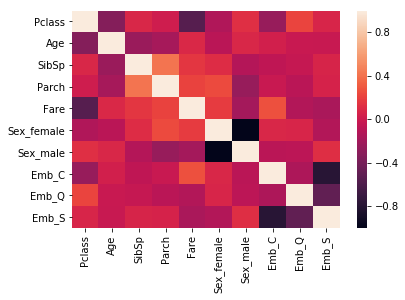

In [12]:
corr = X_train.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [13]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Emb_C,Emb_Q,Emb_S
0,3,34.50000,0,0,7.8292,0,1,0,1,0
1,3,47.00000,1,0,7.0000,1,0,0,0,1
2,2,62.00000,0,0,9.6875,0,1,0,1,0
3,3,27.00000,0,0,8.6625,0,1,0,0,1
4,3,22.00000,1,1,12.2875,1,0,0,0,1
5,3,14.00000,0,0,9.2250,0,1,0,0,1
6,3,30.00000,0,0,7.6292,1,0,0,1,0
7,2,26.00000,1,1,29.0000,0,1,0,0,1
8,3,18.00000,0,0,7.2292,1,0,1,0,0
9,3,21.00000,2,0,24.1500,0,1,0,0,1


In [14]:
X_train['Age'].mean()

29.69911764705882

In [15]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
X_train_scaled

array([[ 0.82737724, -0.5924806 ,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.63878901,  0.43279337, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.2846632 , -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.2846632 , -0.4745452 , ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.17706291, -0.4745452 , ..., -0.48204268,
         3.25137334, -1.62380254]])

In [17]:
X_test_scaled

array([[ 0.82737724,  0.36944878, -0.4745452 , ..., -0.48204268,
         3.25137334, -1.62380254],
       [ 0.82737724,  1.33137817,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-0.36936484,  2.48569343, -0.4745452 , ..., -0.48204268,
         3.25137334, -1.62380254],
       ...,
       [ 0.82737724,  0.67726619, -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       [ 0.82737724,  0.04413122, -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       [ 0.82737724,  0.04413122,  0.43279337, ...,  2.0745051 ,
        -0.30756234, -1.62380254]])

In [29]:
sgd_clf = SGDClassifier()
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="roc_auc")

C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

array([0.7930927 , 0.82957051, 0.8220209 ])

In [30]:
rf_clf = RandomForestClassifier()
cross_val_score(rf_clf, X_train_scaled, y_train, cv=3, scoring="roc_auc")

C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.81595724, 0.86580865, 0.83052919])

In [31]:
ab_clf = AdaBoostClassifier()
cross_val_score(rf_clf, X_train_scaled, y_train, cv=3, scoring="roc_auc")

C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.80486051, 0.85231521, 0.83091266])

In [32]:
LSVC = LinearSVC()
cross_val_score(LSVC, X_train_scaled, y_train, cv=3, scoring="roc_auc")

C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([0.83278209, 0.85794746, 0.85207554])

In [35]:
lin_kernel_SVC = SVC(kernel="linear")
cross_val_score(lin_kernel_SVC, X_train_scaled, y_train, cv=3, scoring="roc_auc")

array([0.82746141, 0.84649123, 0.73549995])

In [36]:
rbf_kernel_SVC = SVC(kernel="rbf")# , C=1, gamma=0.2)
#param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['rbf']}
#grid_SVC = GridSearchCV(SVC(),param_grid,refit = True, verbose=2, n_jobs=-1)
cross_val_score(rbf_kernel_SVC, X_train_scaled, y_train, cv=3, scoring="roc_auc")

C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0.82760522, 0.87117726, 0.84881603])

In [37]:
poly_kernel_SVC = SVC(kernel="poly") #, degree=2, coef0=1, C=1, gamma=0.1)
#param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['poly']}
#grid_SVC = GridSearchCV(SVC(),param_grid,refit = True, verbose=2, n_jobs=-1)
cross_val_score(poly_kernel_SVC, X_train_scaled, y_train, cv=3, scoring="roc_auc")

C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\micha\Anaconda3\envs\ADAC\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0.82094238, 0.86465823, 0.81837791])

In [25]:
poly_kernel_SVC.fit(X_train_scaled, y_train)
predictions = poly_kernel_SVC.predict(X_test_scaled)
p = np.column_stack((data_test['PassengerId'], predictions))
np.savetxt('predictions.csv', p, delimiter=',')